In [2]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from poliastro.bodies import Earth
from astropy.constants import G
from scipy.integrate import solve_ivp
plt.rcParams['font.family'] = 'Serif'
import sympy as sp
sp.init_printing()

# 2.1 Introduction
This chapter presents the vecotr based approach to the classical problem of determining the motion of two bodies due solely to their own gravitational attraction.

# 2.2 Equations of Motion in an Inertial Frame

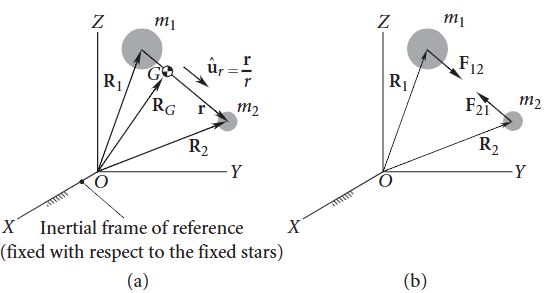

For the two masses $m_1$ and $m_2$ under the influence of just the gravitational forces, it can be proven that the centre of mass $\mathbf R_G$ can be the origin of an inertial frame of reference. The vector $\mathbf R_G$ is given by
$$
    \mathbf{R}_G = \frac{m_1\mathbf R_1 + m_2\mathbf R_2}{m_1 + m_2}
$$

Similarly, the velocity $\mathbf v_G$ and the acceleration $\mathbf a_G$ can be given by,
$$
    \mathbf v_G = \frac{m_1\mathbf{\dot R}_1 + m_2\mathbf{\dot R}_2}{m_1 + m_2}; \ \ \ \mathbf a_G = \frac{m_1\mathbf{\ddot R}_1 + m_2\mathbf{\ddot R}_2}{m_1 + m_2};
$$

Let's define the vector $\mathbf r = \mathbf R_2 - \mathbf R_1$ and the unit vector $\mathbf{\hat u}_r$ given by,
$$
    \mathbf{\hat u}_r = \frac{\mathbf r}{||\mathbf r||}
$$

The force on $m_1$ due to $m_2$ is given by
$$
    \mathbf F_{12} = \frac{Gm_1m_2}{||\mathbf r||^2}\mathbf{\hat u}_r = m_1\ddot{\mathbf R_1}
$$

Similarly, the force on $m_2$ due to $m_1$ is given by,
$$
    \mathbf F_{21} = -\frac{Gm_1m_2}{||\mathbf r||^2}\hat u_r = m_2\ddot{\mathbf R_2}
$$

From this, we can conclude that the acceleration of the centre of mass $\mathbf a_G$ is 0. Thus, the motion of the centre of mass is given by
$$
    \mathbf R_G = \mathbf R_{G_o} + \mathbf v_Gt
$$
Since the centre of mass is a non-accelerating point, it can form an inertial frame of reference.

The gravitation potential $V$ is given by,
$$
    V = \frac{Gm_1m_2}{r}
$$
with the gavitation force derived as
$$
    \mathbf F = \nabla V
$$

# 2.3 Equations of Relative Motion

Let's derive the equations of motion of mass $m_2$ w.r.t $m_1$. Evaluating $m_1\mathbf F_{21} - m_2\mathbf F_{12}$ gives,
$$
    m_1m_2(\mathbf{\ddot R_2} - \mathbf{\ddot R_1}) = -\frac{Gm_1m_2}{r^2}(m_1 + m_2)\mathbf{\hat  u}_r
$$
or
$$
    \mathbf{\ddot r} = -\frac{G(m_1 + m_2)}{r^2}\mathbf{\hat  u}_r = -\frac{\mu}{r^3}\mathbf r
$$
Let's define a coordinate system $xyz$ attached to $m_1$ as shown below

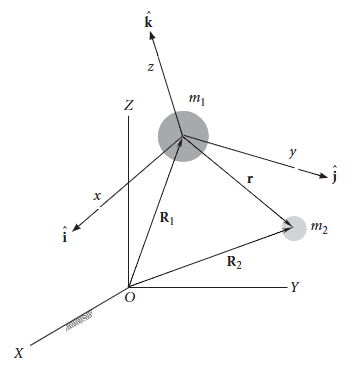

In this frame, the position of $m_2$ relative to $m_1$ is given by $\mathbf r_{\text{rel}} = x\mathbf{\hat  i} + y\mathbf{\hat  j} + z\mathbf{\hat  k}$. Similarly, the velocity and the acceleration is given by,
$$
    \mathbf{\dot r}_{\text{rel}} = \dot x\mathbf{\hat  i} + \dot y\mathbf{\hat  j} + \dot z\mathbf{\hat  k}; \ \ \ \mathbf{\ddot r}_{\text{rel}} = \ddot x\mathbf{\hat  i} + \ddot y\mathbf{\hat  j} + \ddot z\mathbf{\hat  k}
$$

The absolute acceleration can be written using the transport theorem as
$$ 
    \mathbf{\ddot r} = \mathbf{\ddot r}_{\text{rel}} + \mathbf{\dot \Omega}\times\mathbf r_{\text{rel}} + \mathbf\Omega\times(\mathbf\Omega\times\mathbf r_{\text{rel}}) + 2\mathbf\Omega\times\mathbf{\dot r}_{\text{rel}}
$$

It should be noted that $\mathbf{\ddot r} = \mathbf{\ddot r}_{\text{rel}}$ only when $\mathbf\Omega$ and $\mathbf{\dot\Omega}$ are zero, i.e, the frame is not rotating.

Now, we know that the centre of mass is an inertial frame of reference for bodies under their own gravitational force. To track the trajectory of the individual masses in space, it is convenient to write their equations of motion relative to the centre of mass, and then add the trajectory of the COM itself. Let $\mathbf r_1$ and $\mathbf r_2$ be the position vectors of $m_1$ and $m_2$ w.r.t the COM, the force on $m_2$ is given by,
$$
    m_2\mathbf{\ddot r}_2 = -\frac{Gm_1m_2}{r^2}\mathbf{\hat  u}_r
$$

Since the position vector of the COM w.r.t itself is zero, we can write
$$
    m_1\mathbf r_1 + m_2\mathbf r_2 = 0
$$

or,
$$
    \mathbf r_1 = -\frac{m_2}{m_1}\mathbf r_2
$$

Substituting this in the equation $\mathbf r = \mathbf r_2 - \mathbf r_1$, we get
$$
    \mathbf r = \frac{m_1 + m_2}{m_1}\mathbf r_2
$$

Taking the double derivative of this equation, we get
$$
    \mathbf{\ddot r} = \frac{m_1 + m_2}{m_1}\mathbf{\ddot r_2}
$$

Since $\mathbf{\ddot r} = -(\mu/r^3)\mathbf r$, we have
$$
    -\frac{\mu}{r^3}\frac{m_1 + m_2}{m_1}\mathbf r_2 = \frac{m_1 + m_2}{m_1}\mathbf{\ddot r_2}
$$
or
$$
    \mathbf{\ddot r_2} = -\left(\frac{m_1}{m_1 + m_2}\right)^3\frac{\mu}{r_2^3}\mathbf r_2
$$

Let
$$
    \mu' = -\left(\frac{m_1}{m_1 + m_2}\right)^3\mu
$$

Thus,
$$
    \mathbf{\ddot r_2} = -\frac{\mu'}{r_2^3}\mathbf r_2
$$

Similarly, the solution of $\mathbf r_1$ can be given by
$$
    \mathbf{\ddot r_1} = -\frac{\mu''}{r_1^3}\mathbf r_1
$$


# 2.4 Angular Momentum and the Orbit Formulas
In this section, we will derive the trajectory of the bodies governed by the equation of motion of the form:
$$
    \mathbf{\ddot r} = -\frac{\mu}{r^3}\mathbf r
$$

Before that, let's derive a few properties of the trajectory from this equation. Let's define the Anglular Momentum $\mathbf H_{2/1}$ of $m_2$ relative to $m_1$ as
$$
    \mathbf H_{2/1} = \mathbf r\times m_2\mathbf{\dot r}
$$

Define the specific angular momentum $\mathbf h = \mathbf H_{2/1}/m_2$. Taking the time derivative of $\mathbf h$ gives,
$$
    \begin{align*}
        \mathbf{\dot h} &= \mathbf{\dot r}\times\mathbf{\dot r} + \mathbf r\times\mathbf{\ddot r} \\
                     &= -\frac{\mu}{r^3}\mathbf r\times\mathbf r\\
                     &= 0
    \end{align*}
$$

This shows that the specific angular momentum $\mathbf h$ is a constant. It can also be proven that the Areal Velocity $dA/dt$ is a constant and is equal to $h/2$. Now, let's take a cross product of the equation of motion with $\mathbf h$,
$$
    \mathbf{\ddot r}\times\mathbf h = -\frac{\mu}{r^3}\mathbf r\times \mathbf h
$$

The LHS can be written as,
$$
    \begin{align*}
        \mathbf{\ddot r}\times\mathbf h &= \frac{d}{dt}(\mathbf{\dot r} \times \mathbf h) - \mathbf{\dot r}\times\mathbf{\dot h} \ \ \ \ (\mathbf{\dot h} = 0)\\
                                  &= \frac{d}{dt}(\mathbf{\dot r} \times \mathbf h)
    \end{align*}
$$

Similarly, we can rewrite the RHS as,
$$
    \begin{align*}
        \frac{1}{r^3}\mathbf r\times \mathbf h &= \frac{1}{r^3}\mathbf r\times (\mathbf r \times \mathbf{\dot r}) \\
                                         &= \frac{1}{r^3}[\mathbf r(\mathbf r\cdot\mathbf{\dot r}) - \mathbf{\dot r}(\mathbf r\cdot \mathbf r)] \\
                                         &= \frac{1}{r^3}[\mathbf r(r\dot r) - \mathbf{\dot r}r^2] \\
                                         &= \frac{\dot r}{r^2}\mathbf r - \frac{\mathbf{\dot r}}{r} \\
                                         &= -\frac{d}{dt}\left(\frac{\mathbf r}{r}\right)
    \end{align*}
$$

Substituting both the terms, we get,
$$
    \frac{d}{dt}\left(\mathbf{\dot r} \times \mathbf h - \frac{\mu}{r}\mathbf r\right) = 0
$$

Therefore,
$$
    \mathbf{\dot r} \times \mathbf h - \frac{\mu}{r}\mathbf r = \mathbf C
$$

Where $\mathbf C$ is a constant vector with $C = ||\mathbf C||$ as its magnitude. Now, taking a dot product of the above equation with $\mathbf r$ gives,
$$
    \begin{align*}
        \mathbf r\cdot(\mathbf{\dot r} \times \mathbf h) - \frac{\mu}{r}\mathbf r\cdot \mathbf r &= \mathbf r\cdot \mathbf C \\
        (\mathbf r\times\mathbf{\dot r})\cdot \mathbf h - \mu r &= rC\cos\theta \\
        \mathbf h\cdot\mathbf h &= \mu r + rC\cos\theta \\
        \frac{h^2}{\mu} &= r(1 + e\cos\theta) \\ 
        r &= \frac{p}{1 + e\cos\theta}
    \end{align*}
$$
This is the orbit equation, where $\mathbf e = \mathbf C/\mu$ is the eccentricity vector, $\theta$ is the true anomaly and $p=h^2/\mu$ is the semi-latus rectum of the orbit. The line defined by the eccentricity vector is the apse line and the true anomaly is the angle between $\mathbf r$ and $\mathbf e$.

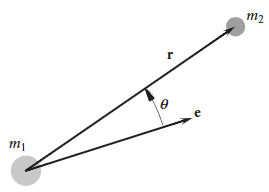

In [129]:
m = 1.5e11
mu = 2*G.value*m
mup = mu/8

R1 = sp.Matrix([0, 0, 0])
R2 = sp.Matrix([5, 0, 0])
dotR1 = sp.Matrix([0, 0, 0])
dotR2 = sp.Matrix([2*np.cos(np.pi/4), 0, 2*np.sin(np.pi/4)])

rC0 = (R1 + R2)/2
vC = (dotR1 + dotR2)/2
rC0Mag = float(rC0.norm())

t = np.linspace(0, 10, 500)
rC = (((vC*t) + np.array(rC0)).T).astype(float)

r = R2 - R1
dotr = dotR2 - dotR1
rMag = float(r.norm())

h = r.cross(dotr)
p = h.norm()**2/mu
C = dotr.cross(h) - mu/rMag*r
CMag = C.norm()
e = (CMag/mu)


In [ ]:
traces = []

phi = np.linspace(0, np.pi, 30)
lam = np.linspace(0, 2*np.pi, 30)
Phi, Lam = np.meshgrid(phi, lam)
Re = 0.5
Xs = Re * np.sin(Phi) * np.cos(Lam)
Ys = Re * np.sin(Phi) * np.sin(Lam)
Zs = Re * np.cos(Phi)

B1 = go.Surface(
    x=Xs, y = Ys, z=Zs,
    opacity=0.5,
    colorscale='Blues',
    showscale=False,
    name='B1'
)

traces.append(B1)

Xs = rMag + Re * np.sin(Phi) * np.cos(Lam)
Ys = Re * np.sin(Phi) * np.sin(Lam)
Zs = Re * np.cos(Phi)

B2 = go.Surface(
    x = Xs, y = Ys, z= Zs,
    opacity=0.5,
    colorscale='Blues',
    showscale=False,
    name='B2'
)

traces.append(B2)

Xs = rC0Mag + Re/3 * np.sin(Phi) * np.cos(Lam)
Ys = Re/3 * np.sin(Phi) * np.sin(Lam)
Zs = Re/3 * np.cos(Phi)

COM = go.Surface(
    x = Xs, y = Ys, z= Zs,
    opacity=0.5,
    colorscale='Reds',
    showscale=False,
    name='COM'
)

traces.append(COM)

trCOM = go.Scatter3d(
    x = rC[:, 0], y = rC[:, 1], z = rC[:, 2],
    mode='lines',
    line=dict(color='green', width=4),
    name='COM Trajectory'
)

traces.append(trCOM)

fig = go.Figure(data=traces)

fig.update_layout(
    # width=800,
    # height=600,

    # Title styling
    # title=dict(
    #     text="3D Equatorial Orbits: LEO / MEO / GEO",
    #     font=dict(size=28)            # title font size
    # ),

    # Legend styling
    # legend=dict(
    #     font=dict(size=16),           # legend text size
    #     bgcolor="rgba(255,255,255,0.7)"  # semi-transparent background (optional)
    # ),

    # Default font for hover, etc.
    font=dict(
        size=14                       # base font size
    ),

    scene=dict(
        xaxis=dict(
            title="X (m)",
            title_font=dict(size=15),  # x-axis label size
            tickfont=dict(size=10)     # x-axis tick label size
        ),
        yaxis=dict(
            title="Y (m)",
            title_font=dict(size=15),
            tickfont=dict(size=10)
        ),
        zaxis=dict(
            title="Z (m)",
            title_font=dict(size=15),
            tickfont=dict(size=10)
        ),
        aspectmode='data'
    )
)

# fig.show()


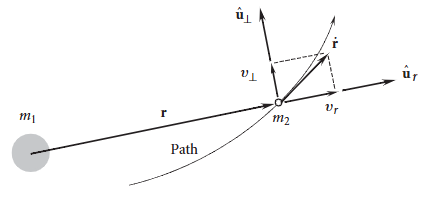

Let's derive the velocity components of the orbiting object. The velocity component perpendicular to $\mathbf r$ is given in terms of the angular velocity $\dot\theta$ as,
$$
    v_{\perp} = r\dot\theta
$$
This gives the specific angular momentum $h=rv_{\perp}$ in terms of the angular velocity as $h=r^2\dot\theta$. With this formulation of $h$, it is convenient to write the azimuthal velocity $v_{\perp}$ in terms of the constants as,
$$
    v_{\perp} = \frac{h}{r} = \frac{\mu}{h}(1 + e\cos\theta)
$$
Since $v_r=\dot r$, we can take the time derivative of the scalar orbit equation to get,
$$
    v_r = \frac{h^2}{\mu}\frac{e\sin\theta}{(1 + e\cos\theta)^2}\frac{h}{r^2}
$$
which upon simplification becomes
$$
    v_r = \frac{\mu}{h}e\sin\theta
$$

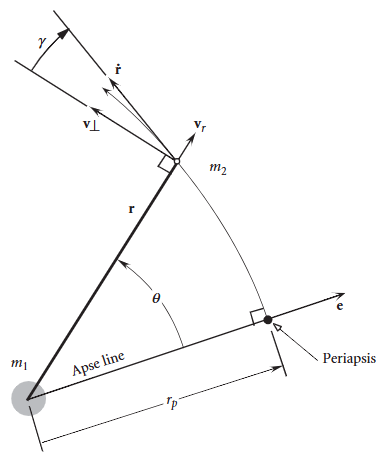

The periapsis $r_p$ is the position of $m_2$ with zero true anomaly, given by
$$
    r_p = \frac{p}{1 + e}
$$
The flight path angle $\gamma$, defined as the angle between $\mathbf{\dot r}$ and the direction perpendicular to $\mathbf r$ (local horizon), is given by
$$
    \tan\gamma = \frac{v_r}{v_{\perp}}
$$
which, upon substitution, becomes
$$
    \tan\gamma = \frac{e\sin\theta}{1 + e\cos\theta}
$$

# 2.5 The Energy Law
We again begin with the equation of relative motion and take a dot product with the relative velocity vector $\mathbf{\dot r}$ as follows,
$$
    \begin{align*}
        \mathbf{\ddot r}\cdot\mathbf{\dot r} &= -\frac{\mu}{r^3}\mathbf r \cdot \mathbf{\dot r} \\
        \frac{1}{2}\frac{d}{dt}(\mathbf{\dot r}\cdot\mathbf{\dot r}) &= -\frac{\mu}{r^3}r\dot r \\
        \frac{1}{2}\frac{d}{dt}(\mathbf v\cdot\mathbf v) &= -\mu\frac{\dot r}{r^2} \\
        \frac{d}{dt}\left(\frac{v^2}{2}\right) &= \frac{d}{dt}\left(\frac{\mu}{r}\right) \\
        \frac{d}{dt}\left(\frac{v^2}{2} - \frac{\mu}{r}\right) &= 0 \\
        \therefore \ \frac{v^2}{2} - \frac{\mu}{r} &= \varepsilon \ (\text{constant})
    \end{align*}
$$
gives the specific energy $\varepsilon$ of the orbit. Here, $v^2/2$ is the relative kinetic energy per unit mass and $(-\mu/r)$ is the potential energy per unit mass of $m_2$ in the gravitational field of $m_1$. This equation demonstrates the principle of energy conservation, showing that the specific mechanical energy $\varepsilon$ is the same at all points in an orbit. This equation is also known as the _vis-viva_ (living-force) equation.

The specific mechanical energy at the periapsis is given by,
$$
    \varepsilon_P = \frac{v_P^2}{2} - \frac{\mu}{r_P}
$$
Since $v_P = v_{\perp}$ at the periapsis and $h = rv_{\perp}$, we have,
$$
    \varepsilon = \frac{1}{2}\frac{h^2}{r_P^2} - \frac{\mu}{r_P} = \frac{\mu}{2}\left(\frac{p}{r_P^2} - \frac{2}{r_P}\right)
$$
Substituting $r_P = p/(1 + e)$, we get the value of $\varepsilon$ purely in terms of the orbital constants as,
$$
    \varepsilon = -\frac{1}{2}\frac{\mu^2}{h^2}(1 - e^2)
$$
The mechanical energy $\Large \boldsymbol{\varepsilon}$ of the mass $m_1$ is given by,
$$
    {\Large \boldsymbol{\varepsilon}} = m_1\varepsilon
$$

# 2.6 Circular Orbits

Circular orbits are characterised by $e=0$, giving the orbit equation as,
$$
    r = \frac{h^2}{\mu}
$$

Since $r$ is constant, $v_r = 0$, therefore $h = vr$. Substituting the orbit equation for $h$ gives,
$$
    v_{\text{circular}} = \sqrt{\frac{\mu}{r}}
$$

The period of the orbit $T$ is given by
$$
    T_{\text{circular}} = \frac{2\pi r}{\sqrt{\mu/r}} = \frac{2\pi}{\sqrt\mu}r^{3/2}
$$

The specific energy of the circular orbit is given by,
$$
    \varepsilon_{\text{circular}} = -\frac{1}{2}\frac{\mu^2}{h^2} = -\frac{\mu}{2r}
$$

Manual orbital spacecrafts, and unmanned remote sensing, navigation and communication satellites occupy circular Low Earth Orbits (LEO), ranging from 150 - 2000 km. LEO is well above the drag producing atmosphere (around 80 km) and well below the hazardous Van Allen radiation belts (innermost threshold of 2400 km). All orbital calculations concerning man-made objects in space have negligible mass compared to Earth, therefore the orbital parameter $\mu$ beomes independent of the mass of teh satellite, giving
$$
    \mu_{\text{earth}} = GM_{\text{earth}} = 398,600 \ km^3/s^2
$$

In [20]:
mu = Earth.k.value
RE = Earth.R.value
z = np.linspace(150, 2000, 1000)

v = np.sqrt(mu/(RE + z*1000))
T = 2*np.pi/np.sqrt(mu)*(RE + z*1000)**1.5

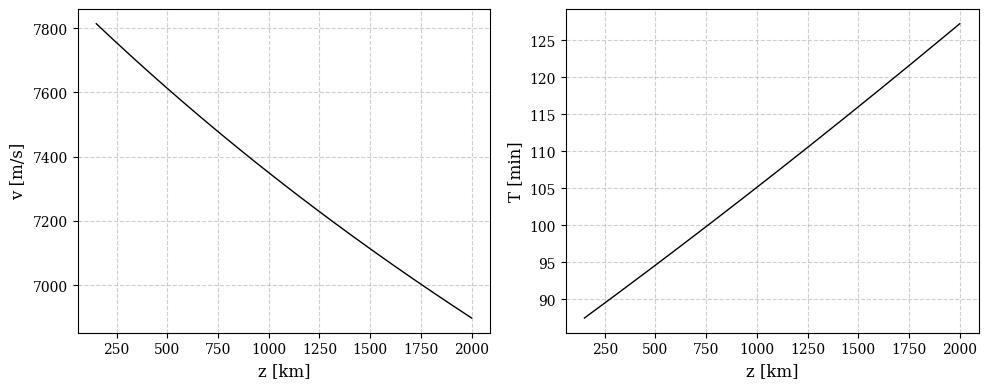

In [24]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(z, v, 'k', lw=1);
plt.grid(ls='--', alpha=0.6)
plt.xlabel('z [km]', size=12)
plt.ylabel('v [m/s]', size=12);

plt.subplot(1,2,2)
plt.plot(z, T/60, 'k', lw=1);
plt.grid(ls='--', alpha=0.6)
plt.xlabel('z [km]', size=12)
plt.ylabel('T [min]', size=12);

plt.tight_layout()

Sateliites that stay stationary above the same point on Earth's equator orbit in a Geosynchronous Equatorial Orbit (GEO). Such satellites have the same period as the Earth's sidereal day. There are two distinct periods percieved on Earth, these are:
1. Sidereal Day: One sidereal day is the time taken by Earth to complete one rotation ($2\pi$ radians) w.r.t the inertial space. 
2. Synodic Day: A synodic day is the time taken by the sun to apparently rotate once around the Earth. This period is what we observe as 24 hours. However, as the Earth is revolving around the sun, by the time it completes one absolute rotation about its axis, it advances $2\pi/365.26$ radians along its solar orbit.

Thus, the angular velocity of the Earth is computed as,
$$
    \omega_E = \frac{(2\pi + 2\pi/365.26)}{24 \ \text{hours}} = 72.9211\times10^{-6} \ rad/s
$$

Any satellite in the GEO must have the same angular velocity $\omega_E$.

In [36]:
wE = Earth.angular_velocity.value
r_GEO = (mu/wE**2)**(1/3)
z_GEO = r_GEO - RE
v_GEO = np.sqrt(mu/r_GEO)
print(z_GEO/1000)
print(v_GEO/1000)

35786.039620488154
3.0746598590079715


The GEO altitude is computd by equating the two values of the GEO speed as $v_{GEO} = \omega_E r_{GEO} = \sqrt{\mu/r_{GEO}}$, which gives 
$$
    r_{GEO} = 35786 \ km; \ \ \ v_{GEO} = 3.075 \ km/s
$$

Communication satellites are placed in the GEO because of their large ground coverage. 

### Ground Coverage

The ground coverage of any satellite is the amout of Earth's surface area visible to the satellite.

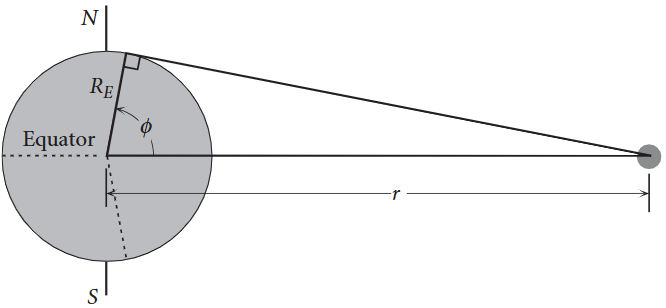

As shown in the image, the maximum latitude upto which a GEO satellite can observe is given by
$$
    \phi = \cos^{-1}\frac{R_E}{r}
$$
which, for $r_{GEO} = 42164 \ km$, comes out to be $81.3^{\circ}$. The ground coverage can then  be calculated as,
$$
    S = 2\pi R_E^2(1 - \cos\phi)
$$
This demonstrates that satellites in GEO cover $42.4\%$ of the total earth surface.

# 2.7 Elliptical Orbits

# 2.8 Parabolic Trajectories

# 2.9 Hyperbolic Trajectories

# 2.10 Perifocal Frame

# 2.11 The Lagrange Coefficients

# 2.12 Restricted Three-Body Problem

## 2.12.1 The Lagrange Points

## 2.12.2 Jacobi Constant